In [1]:
# notebook to illustrate text indexing and basic search

In [2]:
# following only used for development, reloads the modules with any code changes
%load_ext autoreload
%autoreload 2

# inline matplotlib charts
%matplotlib inline

In [3]:
# import our text mining toolkit
import text_mining_toolkit as tmt

In [4]:
cr = tmt.corpus_reader.CorpusReader(content_directory="data_sets/recipes/txt/", text_filename_pattern="??.txt")
#cr = tmt.corpus_reader.CorpusReader(directory_of_files="data_sets/mystery_corpus_01/txt/", text_filename_pattern="??.txt")
#cr = tmt.corpus_reader.CorpusReader(content_directory="data_sets/iraq_inquiry/txt/", text_filename_pattern="the-report*.txt")
#cr = tmt.corpus_reader.CorpusReader(content_directory="data_sets/clinton_emails/txt/", text_filename_pattern="C0*")
#cr = tmt.corpus_reader.CorpusReader(content_directory="data_sets/shakespeare_macbeth/txt/", text_filename_pattern="macbeth_act_0?_scene_0?.txt")

content_directory =  data_sets/recipes/txt/
text_filename_pattern =  ??.txt
self.documents populated =  22


In [5]:
# first clear index
tmt.index_search.delete_indices(cr.content_directory)

# for all documents in corpus
for document_name in cr.get_documents():
    #print("processing ", document_name)

    # get document text
    document_text = cr.get_text_by_document(document_name)

    # simplify whitespace (remove newlines)
    b = tmt.text_processing.simplify_whitespace(document_text)

    # only keep alphanumeric characters, removes punctuation
    c = tmt.text_processing.keep_alphanumeric(b)

    # make lowercase
    d = tmt.text_processing.to_lowercase(c)

    # split into words list
    dl = tmt.text_processing.split_text_into_words(d)
    
    # build n-grams
    #gl = tmt.word_processing.build_ngrams_from_words(dl,2)

    # remove stop words
    #el = tmt.word_processing.remove_stop_words(dl, "./stopwords/minimal-stop.txt")
    
    # update index
    tmt.index_search.create_wordcount_index_for_document(cr.content_directory, document_name, dl)
    pass


removed wordcount index file:  data_sets/recipes/txt/index_wordcount.hdf5


In [6]:
# merge document indices into a corpus index
tmt.index_search.merge_wordcount_indices_for_corpus(cr.content_directory)

In [10]:
# create relevance index
tmt.index_search.calculate_relevance_index2(cr.content_directory)

NameError: name 'frequency_index' is not defined

In [8]:
tmt.index_search.print_index(cr.content_directory)

wordcount_index_file  data_sets/recipes/txt/index_wordcount.hdf5
       word  00.txt   ...    20.txt  21.txt
0      b'1'     0.0   ...       0.0     0.0
1     b'12'     0.0   ...       0.0     1.0
2     b'14'     0.0   ...       0.0     0.0
3      b'2'     0.0   ...       0.0     0.0
4      b'3'     0.0   ...       0.0     0.0
5     b'32'     0.0   ...       0.0     0.0
6      b'4'     0.0   ...       0.0     0.0
7     b'54'     0.0   ...       0.0     0.0
8      b'a'     2.0   ...       2.0     7.0
9  b'about'     0.0   ...       0.0     0.0

[10 rows x 23 columns]


OSError: Unable to open file (Unable to open file: name = 'data_sets/recipes/txt/index_relevance.hdf5', errno = 2, error message = 'no such file or directory', flags = 0, o_flags = 0)

In [8]:
tmt.index_search.search_wordcount_index(cr.content_directory, "bread soaked in milk")

the-report-of-the-iraq-inquiry_section-121.txt          3214.0
the-report-of-the-iraq-inquiry_section-96.txt           2090.0
the-report-of-the-iraq-inquiry_section-141.txt          2060.0
the-report-of-the-iraq-inquiry_section-65.txt           2047.0
the-report-of-the-iraq-inquiry_section-95.txt           1851.0
the-report-of-the-iraq-inquiry_section-15-1.txt         1747.0
the-report-of-the-iraq-inquiry_section-102.txt          1619.0
the-report-of-the-iraq-inquiry_section-92.txt           1619.0
the-report-of-the-iraq-inquiry_section-61.txt           1601.0
the-report-of-the-iraq-inquiry_section-64.txt           1559.0
the-report-of-the-iraq-inquiry_section-101.txt          1528.0
the-report-of-the-iraq-inquiry_section-35.txt           1478.0
the-report-of-the-iraq-inquiry_section-37.txt           1451.0
the-report-of-the-iraq-inquiry_executive-summary.txt    1399.0
the-report-of-the-iraq-inquiry_section-38.txt           1378.0
the-report-of-the-iraq-inquiry_section-11.txt          

In [9]:
tmt.index_search.search_relevance_index(cr.content_directory, "bread soaked in milk")

the-report-of-the-iraq-inquiry_section-96.txt    0.000008
dtype: float64

In [10]:
words_by_relevance = tmt.index_search.get_words_by_relevance(cr.content_directory)
# 20 most common
words_by_relevance[:20]

that                0.022163
basra               0.022054
resolution          0.020293
multinational       0.019435
debaathification    0.019325
map                 0.015562
had                 0.013133
inspectors          0.012638
president           0.012216
baghdad             0.012104
mndse               0.012025
2002                0.012001
would               0.011862
reconstruction      0.011742
weapons             0.011234
dfid                0.011206
police              0.011176
wmd                 0.011156
intelligence        0.011061
saddam              0.011052
dtype: float64

In [11]:
# 20 least common
words_by_relevance[-20:]

hrg        0.000003
90k        0.000003
gee        0.000003
fa         0.000003
mg         0.000002
mq         0.000002
db         0.000002
to         0.000000
a          0.000000
the        0.000000
and        0.000000
on         0.000000
of         0.000000
from       0.000000
iraq       0.000000
inquiry    0.000000
report     0.000000
in         0.000000
for        0.000000
           0.000000
dtype: float64

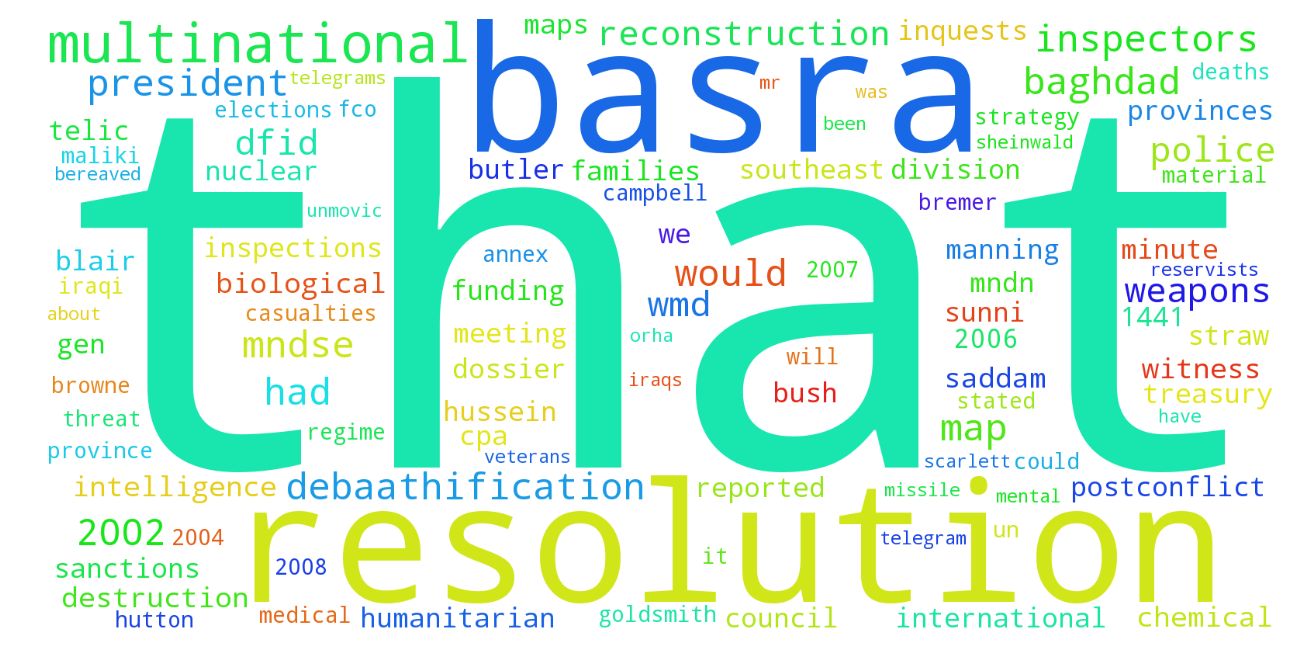

In [12]:
# visualise most relevance words
tmt.visualisation.plot_wordcloud(words_by_relevance)